- Problem statement:A major bank in Middle East came to NeoStats with help in analysing its current customer base and its marketing campaigns. It wants to understand which customers are most likely to take a term deposit (fixed deposit), and then send this list to their call centre.

-  So we have to create classificaton model for bank so that it makes more easier to them identify the customers who likely to subscribe the Term Deposit(Fixed Deposit)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xg
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",50)

In [3]:
file_path = r"D:\neostats assg\Banking Case - Data\Banking Case - Data.xlsx"

df_1 = pd.read_excel(file_path, sheet_name=1)

df_2 = pd.read_excel(file_path, sheet_name=2)

In [4]:
df_1

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,0,1001,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0
1,1,1002,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
2,2,1003,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0
3,3,1004,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
4,4,1005,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,46207,no,825,no,no,cellular,0.0,0,-1,0,unknown,yes,152.0
45207,45207,46208,no,1729,no,no,cellular,0.0,0,-1,0,unknown,yes,334.0
45208,45208,46209,no,5715,no,no,cellular,1127.0,5,184,3,success,yes,381.0
45209,45209,46210,no,668,no,no,telephone,0.0,0,-1,0,unknown,no,211.0


In [5]:
df_2

,Customer_number,age,job,marital,education,Annual Income,Gender
0,1001,58,management,married,tertiary,839368,M
1,1002,44,technician,single,secondary,1452858,M
2,1003,33,entrepreneur,married,NaN,4851383,F
3,1004,47,blue collar,married,unknown,3207754,F
4,1005,33,unknown,single,unknown,2562322,M
...,...,...,...,...,...,...,...
45206,46207,51,technician,married,tertiary,2229818,M
45207,46208,121,retired,divorced,primary,2783556,M
45208,46209,72,retired,married,secondary,443512,M
45209,46210,57,blue-collar,married,secondary,4193684,F


- Given that one table df_1 contains loan details of customers and the df_2 table contains demographic information, it's likely that we want to keep these datasets separate for most analyses. In this case, it makes sense to preprocess them separately since they have different types of information and are likely to require distinct preprocessing steps.

### Preprocessing Loan Details Data (df_1):

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               45211 non-null  int64  
 1   Customer_number   45211 non-null  int64  
 2   Insurance         45211 non-null  object 
 3   balance           45156 non-null  object 
 4   housing           45211 non-null  object 
 5   loan              45203 non-null  object 
 6   contact           45168 non-null  object 
 7   duration          45172 non-null  float64
 8   campaign          45211 non-null  int64  
 9   last_contact_day  45211 non-null  int64  
 10  previous          45211 non-null  int64  
 11  poutcome          45196 non-null  object 
 12  Term Deposit      45203 non-null  object 
 13  Count_Txn         45210 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 4.8+ MB


### Missing values in df_1 Dataset

In [7]:
null_df1=(df_1.isnull().sum()/len(df_1))*100
null_df1

Sno                 0.000000
Customer_number     0.000000
Insurance           0.000000
balance             0.121652
housing             0.000000
loan                0.017695
contact             0.095110
duration            0.086262
campaign            0.000000
last_contact_day    0.000000
previous            0.000000
poutcome            0.033178
Term Deposit        0.017695
Count_Txn           0.002212
dtype: float64

In [8]:
null_features_df1 = []
not_null_features_df1 = []

for i in df_1.columns:
    if df_1[i].isnull().any():
        null_features_df1.append(i)
    else:
        not_null_features_df1.append(i)
print(f"null features:{null_features_df1}")
print(f"not_null features:{not_null_features_df1}")

null features:['balance', 'loan', 'contact', 'duration', 'poutcome', 'Term Deposit', 'Count_Txn']
not_null features:['Sno', 'Customer_number', 'Insurance', 'housing', 'campaign', 'last_contact_day', 'previous']


- As we can see very small percentage of null values in features balance,loan,contact,duration,poutcome,Term Deposit,Count_Txn

### Check for duplicate rows in df_1 dataset

In [9]:
df_1[df_1.duplicated()]

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn


- There are no duplicate rows in df_1 dataset

- will carry out the null value imputation based on their distribution for numerical features and replace with mode in categorical feature

In [10]:
df_1['balance']=pd.to_numeric(df_1['balance'],errors='coerce')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               45211 non-null  int64  
 1   Customer_number   45211 non-null  int64  
 2   Insurance         45211 non-null  object 
 3   balance           45130 non-null  float64
 4   housing           45211 non-null  object 
 5   loan              45203 non-null  object 
 6   contact           45168 non-null  object 
 7   duration          45172 non-null  float64
 8   campaign          45211 non-null  int64  
 9   last_contact_day  45211 non-null  int64  
 10  previous          45211 non-null  int64  
 11  poutcome          45196 non-null  object 
 12  Term Deposit      45203 non-null  object 
 13  Count_Txn         45210 non-null  float64
dtypes: float64(3), int64(5), object(6)
memory usage: 4.8+ MB


In [11]:
null_df1=df_1[null_features_df1]
null_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   balance       45130 non-null  float64
 1   loan          45203 non-null  object 
 2   contact       45168 non-null  object 
 3   duration      45172 non-null  float64
 4   poutcome      45196 non-null  object 
 5   Term Deposit  45203 non-null  object 
 6   Count_Txn     45210 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.4+ MB


- Check for the distribution of numeric columns for null value imputation 

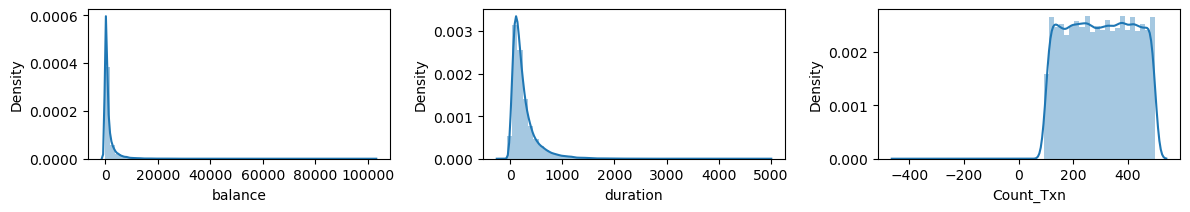

In [12]:
fig=plt.figure(figsize=(12,6))
count=1
for i,j in enumerate(null_df1.select_dtypes('number').columns):
    plt.subplots_adjust(left=0.75,bottom=0.75,right=2,top=2, wspace=0.1,hspace=0.1)
    fig,plt.subplot(3,3,count)
    sns.distplot(df_1[j])
    count+=1
plt.tight_layout()
plt.show()

- Features such as balance,duration are rightly skwed and Count_Txn are negatively skewed so its better replace the null values by median 

- Check for outliers in null features in df_1

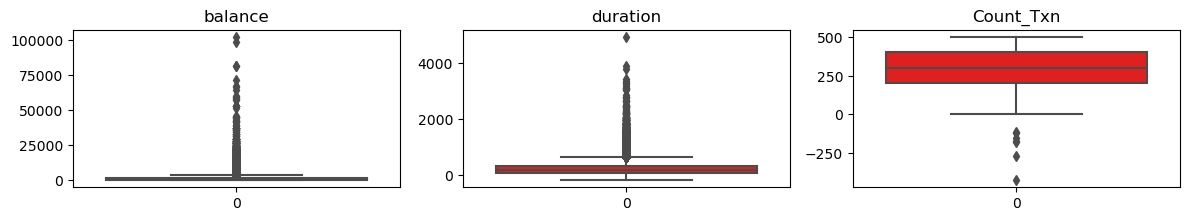

In [13]:
fig=plt.figure(figsize=(12,6))
count=1
for i,j in enumerate(null_df1.select_dtypes('number').columns):
    plt.subplots_adjust(left=0.75,bottom=0.75,right=2,top=2, wspace=0.1,hspace=0.1)
    fig,plt.subplot(3,3,count)
    sns.boxplot(df_1[j],color='red')
    plt.title(j)
    count+=1
plt.tight_layout()
plt.show()

- Skewed features such as 'balance', 'duration', and 'Count_Txn' are  better to be imputed with the median rather than the mean. The median is less sensitive to outliers and provides a better representation of the central tendency in skewed distributions.

### Replace the null values with median

In [14]:
df_1['balance'].fillna(df_1['balance'].median(), inplace=True)
df_1['duration'].fillna(df_1['duration'].median(), inplace=True)
df_1['Count_Txn'].fillna(df_1['Count_Txn'].median(), inplace=True)

### Replace the null values in categorical features

In [15]:
df_1['loan'].value_counts()

no     37959
yes     7244
Name: loan, dtype: int64

In [16]:
df_1['contact'].value_counts()

cellular     29282
unknown      12970
telephone     2850
Mobile          29
Tel             20
?               17
Name: contact, dtype: int64

In [17]:
df_1['poutcome'].value_counts()

unknown    36884
failure     4901
other       1840
success     1511
pending       55
?              4
????           1
Name: poutcome, dtype: int64

In [18]:
df_1['Term Deposit'].value_counts()

no     39914
yes     5289
Name: Term Deposit, dtype: int64

# Replace the null values in categorical values with mode

In [19]:
categorical_columns = ['loan', 'contact', 'poutcome', 'Term Deposit']

for column in categorical_columns:
    mode_value = df_1[column].mode()[0]  
    df_1[column].fillna(mode_value, inplace=True)

-  due to presence of characters like '?' and '????' in the  column ('poutcome' and contact) is considered a form of data inconsistency so will replace them with mode value

In [20]:
df_1['poutcome'].replace(['?', '????'], 'unknown', inplace=True)
df_1['contact'].replace(['?'], 'cellular', inplace=True)

In [21]:
df_1['poutcome'].value_counts()

unknown    36904
failure     4901
other       1840
success     1511
pending       55
Name: poutcome, dtype: int64

In [22]:
df_1['contact'].value_counts()

cellular     29342
unknown      12970
telephone     2850
Mobile          29
Tel             20
Name: contact, dtype: int64

### Cross check if there is any null values and duplicates in df_1

In [23]:
df_1.isnull().sum()

Sno                 0
Customer_number     0
Insurance           0
balance             0
housing             0
loan                0
contact             0
duration            0
campaign            0
last_contact_day    0
previous            0
poutcome            0
Term Deposit        0
Count_Txn           0
dtype: int64

In [24]:
df_1.duplicated().sum()

0

#### There are no null and duplicates in df_1 dataset

### Preprocessing Loan Details Data (df_2),Also we follow same data preprocessing as we done in dataset df_1

In [25]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer_number  45211 non-null  int64 
 1   age              45211 non-null  int64 
 2   job              45198 non-null  object
 3   marital          45193 non-null  object
 4   education        45190 non-null  object
 5   Annual Income    45194 non-null  object
 6   Gender           45211 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.4+ MB


### Missing values in df_2 Dataset

In [26]:
null_df2=(df_2.isnull().sum()/len(df_2))*100
null_df2

Customer_number    0.000000
age                0.000000
job                0.028754
marital            0.039813
education          0.046449
Annual Income      0.037601
Gender             0.000000
dtype: float64

In [27]:
null_features_df2 = []
not_null_features_df2 = []

for i in df_2.columns:
    if df_2[i].isnull().any():
        null_features_df2.append(i)
    else:
        not_null_features_df2.append(i)
print(f"null features:{null_features_df2}")
print(f"not_null features:{not_null_features_df2}")

null features:['job', 'marital', 'education', 'Annual Income']
not_null features:['Customer_number', 'age', 'Gender']


- As we can see very small percentage of null values in features job,marital,education,Annual Income features

### Check for duplicate rows in df_2 dataset

In [28]:
df_2[df_2.duplicated()]

,Customer_number,age,job,marital,education,Annual Income,Gender


- There are no duplicate rows in df_2 dataset

- will carry out the null value imputation based on their distribution for numerical features and replace with mode in categorical feature

In [29]:
df_2['Annual Income']=pd.to_numeric(df_2['Annual Income'],errors='coerce')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_number  45211 non-null  int64  
 1   age              45211 non-null  int64  
 2   job              45198 non-null  object 
 3   marital          45193 non-null  object 
 4   education        45190 non-null  object 
 5   Annual Income    45193 non-null  float64
 6   Gender           45211 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.4+ MB


In [30]:
null_df2=df_2[null_features_df2]
null_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job            45198 non-null  object 
 1   marital        45193 non-null  object 
 2   education      45190 non-null  object 
 3   Annual Income  45193 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.4+ MB


<AxesSubplot:xlabel='Annual Income', ylabel='Density'>

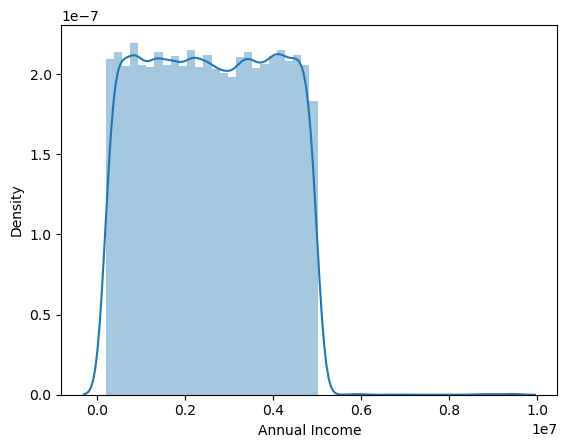

In [31]:
sns.distplot(df_2['Annual Income'],kde=True)

<AxesSubplot:>

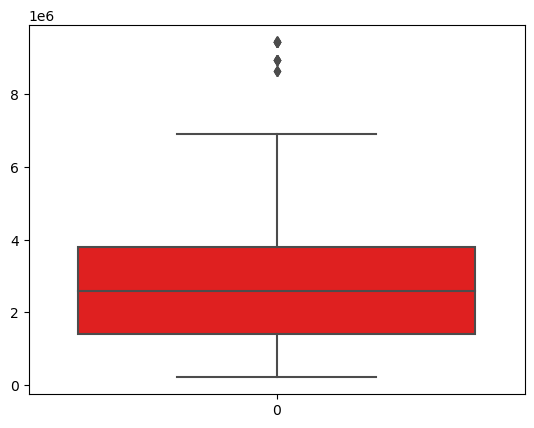

In [32]:
sns.boxplot(df_2['Annual Income'],color='red')

### Annual income feature is right skewed we replace with median value and got few outliers

In [33]:
df_2['Annual Income'].fillna(df_2['Annual Income'].median(),inplace=True)

In [34]:
df_2['marital'].value_counts()

married     27202
single      12787
divorced     5204
Name: marital, dtype: int64

In [35]:
df_2['job'].value_counts()

blue-collar      9623
management       9455
technician       7595
admin.           5171
services         4153
retired          2264
self-employed    1579
entrepreneur     1486
unemployed       1302
housemaid        1240
student           938
unknown           288
blue collar       104
Name: job, dtype: int64

In [36]:
df_2['education'].value_counts()

secondary    23187
tertiary     13296
primary       6845
unknown       1857
Primary          3
ter tiary        2
Name: education, dtype: int64

In [37]:
df_2['marital'].fillna(df_2['marital'].mode()[0], inplace=True)
df_2['education'].fillna(df_2['education'].mode()[0], inplace=True)
df_2['job'].fillna(df_2['job'].mode()[0], inplace=True)

### Cross check if there is any null values and duplicates in df_2

In [38]:
df_2.isnull().sum()

Customer_number    0
age                0
job                0
marital            0
education          0
Annual Income      0
Gender             0
dtype: int64

In [39]:
df_2.duplicated().sum()

0

### Data preprocessing for both datasets for df_1 and df_2 are done and now we merge them as one dataset and perform analysis

In [40]:
merged_df = pd.merge(df_1, df_2, on='Customer_number', how='inner')
merged_df

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,0,1001,no,2143.0,yes,no,cellular,261.0,1,2,0,unknown,no,351.0,58,management,married,tertiary,839368.0,M
1,1,1002,no,29.0,yes,no,unknown,151.0,1,2,0,unknown,no,326.0,44,technician,single,secondary,1452858.0,M
2,2,1003,no,2.0,yes,yes,unknown,76.0,1,2,0,unknown,no,422.0,33,entrepreneur,married,secondary,4851383.0,F
3,3,1004,no,1506.0,yes,no,unknown,92.0,1,2,0,unknown,no,113.0,47,blue collar,married,unknown,3207754.0,F
4,4,1005,no,1.0,no,no,unknown,198.0,1,2,0,unknown,no,342.0,33,unknown,single,unknown,2562322.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,46207,no,825.0,no,no,cellular,0.0,0,-1,0,unknown,yes,152.0,51,technician,married,tertiary,2229818.0,M
45207,45207,46208,no,1729.0,no,no,cellular,0.0,0,-1,0,unknown,yes,334.0,121,retired,divorced,primary,2783556.0,M
45208,45208,46209,no,5715.0,no,no,cellular,1127.0,5,184,3,success,yes,381.0,72,retired,married,secondary,443512.0,M
45209,45209,46210,no,668.0,no,no,telephone,0.0,0,-1,0,unknown,no,211.0,57,blue-collar,married,secondary,4193684.0,F


- Given that we have a common 'customer_no' column in both datasets, using an inner join would likely be the best choice in most cases and allows us to do analyzing only the data for customers who exist in both datasets, ensuring that you're working with complete information for those customers.

In [41]:
merged_df.isnull().sum()

Sno                 0
Customer_number     0
Insurance           0
balance             0
housing             0
loan                0
contact             0
duration            0
campaign            0
last_contact_day    0
previous            0
poutcome            0
Term Deposit        0
Count_Txn           0
age                 0
job                 0
marital             0
education           0
Annual Income       0
Gender              0
dtype: int64

In [42]:
merged_df.duplicated().sum()

0

In [43]:
merged_df.columns

Index(['Sno', 'Customer_number', 'Insurance', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'last_contact_day', 'previous',
       'poutcome', 'Term Deposit', 'Count_Txn', 'age', 'job', 'marital',
       'education', 'Annual Income', 'Gender'],
      dtype='object')

In [44]:
df=merged_df.copy()
df.head()

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,0,1001,no,2143.0,yes,no,cellular,261.0,1,2,0,unknown,no,351.0,58,management,married,tertiary,839368.0,M
1,1,1002,no,29.0,yes,no,unknown,151.0,1,2,0,unknown,no,326.0,44,technician,single,secondary,1452858.0,M
2,2,1003,no,2.0,yes,yes,unknown,76.0,1,2,0,unknown,no,422.0,33,entrepreneur,married,secondary,4851383.0,F
3,3,1004,no,1506.0,yes,no,unknown,92.0,1,2,0,unknown,no,113.0,47,blue collar,married,unknown,3207754.0,F
4,4,1005,no,1.0,no,no,unknown,198.0,1,2,0,unknown,no,342.0,33,unknown,single,unknown,2562322.0,M


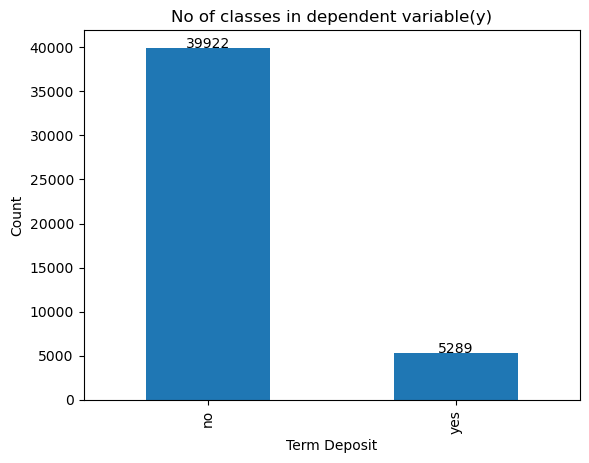

In [45]:
df['Term Deposit'].value_counts().plot(kind='bar')
plt.title('No of classes in dependent variable(y)')
plt.xlabel('Term Deposit')
plt.ylabel('Count')

for i,j in enumerate(df['Term Deposit'].value_counts()):
    plt.text(i,j,str(j),ha='center')

The output class is imbalanced in our dataset. The output class has two categories: "Yes" and "No" The count of samples in each category is as follows:

"no": 39922 samples

"yes": 5289 samples

### Distribution of numerical features(univariate analysis)

In [46]:
numerical_features=df.select_dtypes('number').columns
numerical_features

Index(['Sno', 'Customer_number', 'balance', 'duration', 'campaign',
       'last_contact_day', 'previous', 'Count_Txn', 'age', 'Annual Income'],
      dtype='object')

In [47]:
cat_features=df.select_dtypes('object').columns
cat_features

Index(['Insurance', 'housing', 'loan', 'contact', 'poutcome', 'Term Deposit',
       'job', 'marital', 'education', 'Gender'],
      dtype='object')

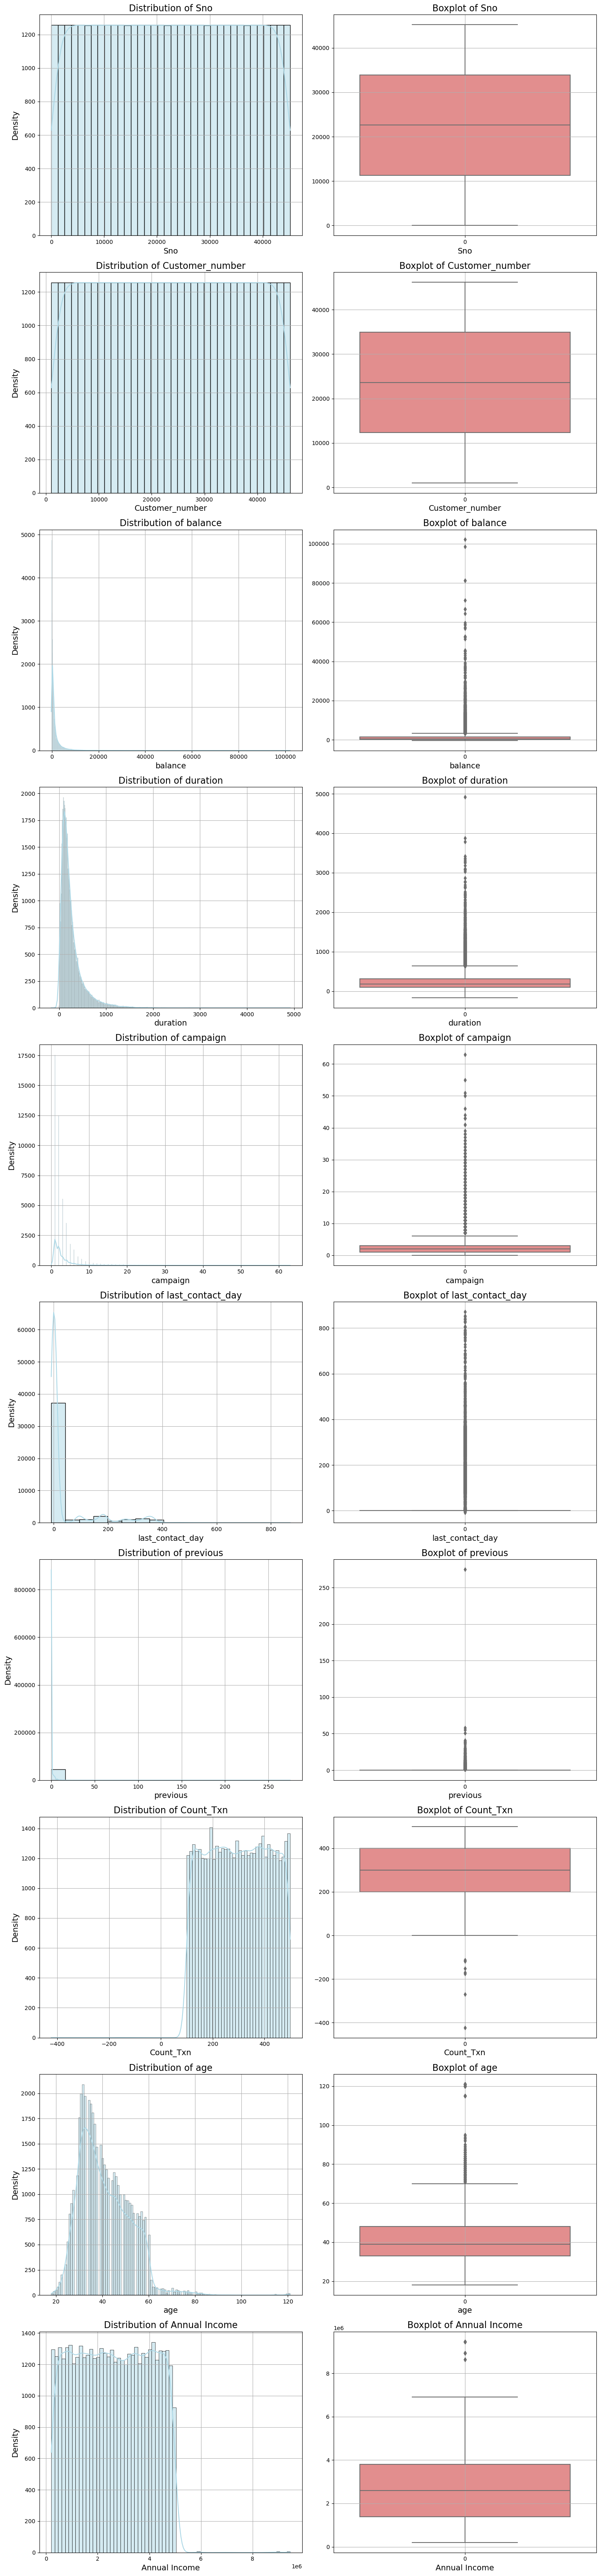

In [48]:
fig, ax = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15,64))

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=ax[i][0], color='lightblue', edgecolor='k')
    sns.boxplot(df[col], ax=ax[i][1], color='lightcoral')
    # histogram
    ax[i][0].set_title(f'Distribution of {col}', fontsize=16)
    ax[i][0].set_xlabel(col, fontsize=14)
    ax[i][0].set_ylabel('Density', fontsize=14)
    ax[i][0].grid(True)
    # Boxplot
    ax[i][1].set_title(f'Boxplot of {col}', fontsize=16)
    ax[i][1].set_xlabel(col, fontsize=14)
    ax[i][1].grid(True)

plt.tight_layout()
plt.show()

- Almost all the numerical features contain the outliers and skewed,so before treating the outliers we have to build base model,so accordingly we treat them if needed to improve the model performance

In [49]:
df.drop(columns=['Sno','Customer_number'],inplace=True)

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,45211.0,1.415545e+03,3.020390e+03,-280.0,138.0,486.5,1435.5,102127.0
duration,45211.0,2.580721e+02,2.575305e+02,-167.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.762182e+00,3.087291e+00,0.0,1.0,2.0,3.0,63.0
last_contact_day,45211.0,4.183225e+01,9.945703e+01,-9.0,1.0,1.0,1.0,871.0
previous,45211.0,5.803234e-01,2.303441e+00,0.0,0.0,0.0,0.0,275.0
Count_Txn,45211.0,2.996150e+02,1.157205e+02,-423.0,200.0,300.0,400.0,499.0
age,45211.0,4.098000e+01,1.083827e+01,18.0,33.0,39.0,48.0,121.0
Annual Income,45211.0,2.596565e+06,1.393045e+06,200600.0,1387230.0,2586789.0,3802628.5,9458762.0


### Based on Descriptive statistics

- 1) Balance:
- The mean of 1415.545 indicates a moderate average balance maintained b customers.
- The standard deviation of 3020.39 indicates a wide spread of account balances.
- The higher quartiles suggest that a significant portion of customers have higher balances, with a maximum value of 102127 indicating potential outliers.

- 2)duration
- The mean of 258.0721 indicates the average duration of call with customer.
- The standard deviation of 257.5305 indicates a wide spread of contact durations.
- The presence of a negative value (-167) might indicate data entry errors or special meanings for certain records.
- The quartiles and maximum value suggest variability in contact duration, with some very long contacts possibly indicating important interactions.

- 3)campaign 
- The mean of 2.762182 suggests an average number of campaign contacts.
- The minimum value of 0 suggests that some customers were not contacted during the campaign.

- 4)last_contact_day 
- The mean of 41.83225 indicates an average day of last contact.
- The standard deviation of 99.45703 suggests considerable variability.
- The presence of negative values (-9) might indicate data entry errors or special meanings.

- 5)previous 
- The mean of 0.5803234 indicates an average number of previous contacts.
- The standard deviation of 2.303441 indicates variability in the number of previous contacts.
- The minimum value of 0 indicates some customers were not contacted before.

- 6)Count_Txn
- The mean of 299.615 indicates an average transaction count.
- The standard deviation of 115.7205 suggests variability in transaction counts.
- The presence of a negative value (-423) might indicate data entry errors or special meanings.

- 7)age 
- The mean of 40.98 indicates an average age.
- The standard deviation of 10.83827 suggests variability in ages.
- The minimum age of 18 and maximum age of 121 indicate the range of customer ages.

- 8)Annual Income
- The mean of 2596565 suggests a large average annual income.
- The standard deviation of 1393045 indicates variability in income.
- The minimum income of 200600 and maximum income of 9458762 suggest a wide range.

### 1)Income Insights:
- How many customers have no annual income? Plot and present the data distribution
of these customers.

In [ ]:
customers_with_no_income = merged_df[merged_df['Annual Income'] == 0]
num_customers_no_income = len(customers_with_no_income)
num_customers_with_income = len(merged_df) - num_customers_no_income

categories = ['Customers with Income', 'Customers without Income']
counts = [num_customers_with_income, num_customers_no_income]

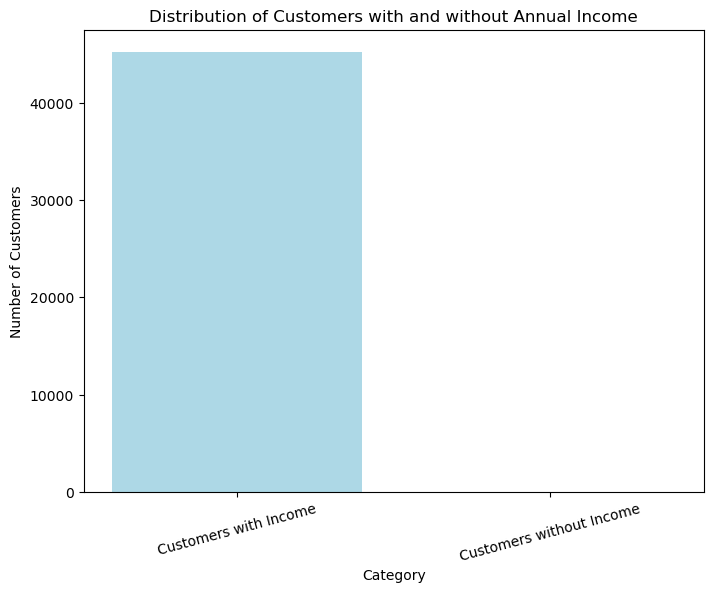

Number of customers with no annual income: 0


In [89]:
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['lightblue', 'lightcoral'])
plt.xlabel('Category')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers with and without Annual Income')
plt.xticks(rotation=15)
plt.show()
print(f"Number of customers with no annual income: {num_customers_no_income}")


### 2)Loan-less Customers Profile:
- Filter out customers who don’t have any type of loan. Plot the distribution of their Income, balance, and profession. How do these metrics differ from those with loans?

In [90]:
df.columns

Index(['Insurance', 'balance', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'last_contact_day', 'previous', 'poutcome', 'Term Deposit',
       'Count_Txn', 'age', 'job', 'marital', 'education', 'Annual Income',
       'Gender'],
      dtype='object')

Loan-less Customers:
       Annual Income        balance
count   1.720400e+04   17204.000000
mean    2.587248e+06    1752.971635
std     1.377529e+06    3793.694407
min     2.006000e+05    -280.000000
25%     1.411355e+06     133.000000
50%     2.562544e+06     588.000000
75%     3.769390e+06    1880.250000
max     9.455899e+06  102127.000000

Loaned Customers:
       Annual Income       balance
count   2.800700e+04  28007.000000
mean    2.602288e+06   1208.272700
std     1.402485e+06   2402.792994
min     2.007770e+05    -32.000000
25%     1.376214e+06    141.000000
50%     2.598148e+06    447.000000
75%     3.823194e+06   1222.000000
max     9.458762e+06  58544.000000


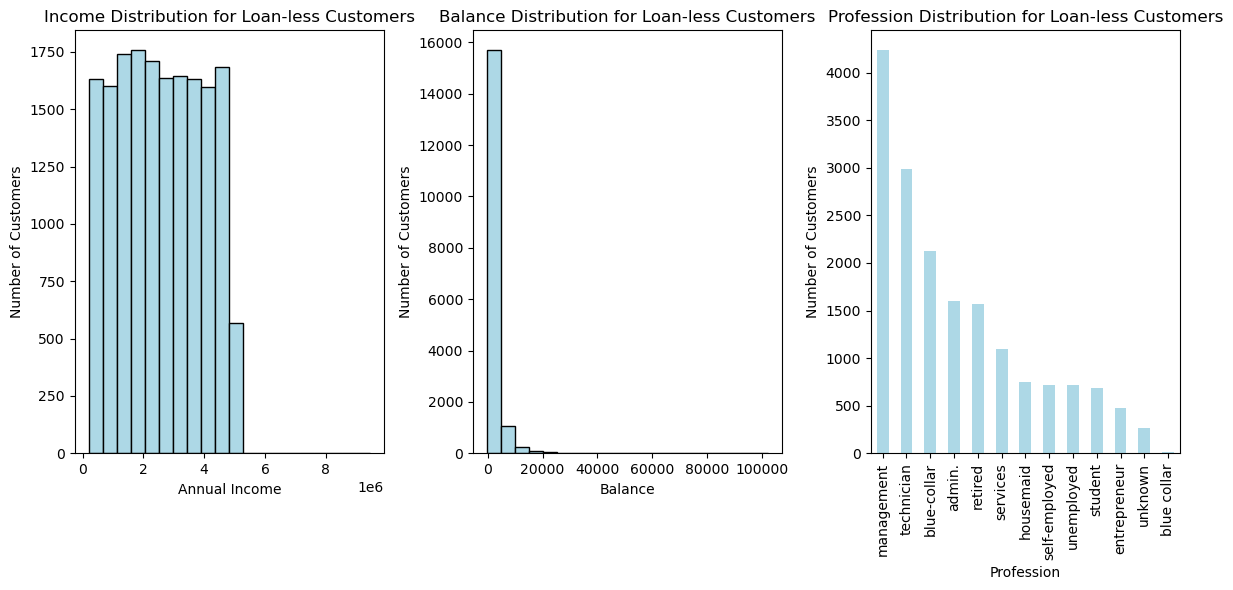

In [93]:
loan_less_customers = merged_df[(merged_df['loan'] == 'no') & (merged_df['housing'] == 'no')]
loaned_customers = merged_df[(merged_df['loan'] == 'yes') | (merged_df['housing'] == 'yes')]

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(loan_less_customers['Annual Income'], bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')
plt.title('Income Distribution for Loan-less Customers')

plt.subplot(1, 3, 2)
plt.hist(loan_less_customers['balance'], bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Balance Distribution for Loan-less Customers')

plt.subplot(1, 3, 3)
loan_less_customers['job'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Profession')
plt.ylabel('Number of Customers')
plt.title('Profession Distribution for Loan-less Customers')
plt.xticks(rotation=90)
plt.tight_layout()

print("Loan-less Customers:")
print(loan_less_customers[['Annual Income', 'balance', 'job']].describe())

print("\nLoaned Customers:")
print(loaned_customers[['Annual Income', 'balance', 'job']].describe())


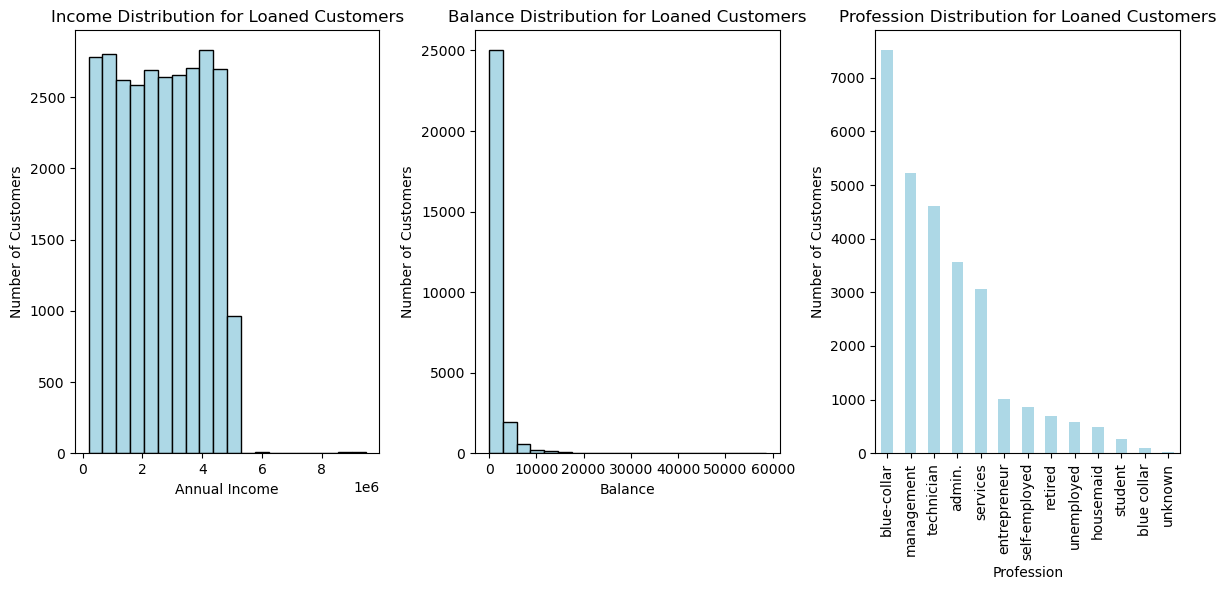

In [95]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(loaned_customers['Annual Income'], bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')
plt.title('Income Distribution for Loaned Customers')

plt.subplot(1, 3, 2)
plt.hist(loaned_customers['balance'], bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Balance Distribution for Loaned Customers')

plt.subplot(1, 3, 3)
loaned_customers['job'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Profession')
plt.ylabel('Number of Customers')
plt.title('Profession Distribution for Loaned Customers')
plt.xticks(rotation=90)
plt.tight_layout()

- Annual Income: The mean annual income is slightly higher for loaned customers (2,602,288) compared to loan-less customers (2,587,248). However, the difference in means is relatively small.
- Balance: Loaned customers have a lower mean balance (1,208.27) compared to loan-less customers (1,752.97). Loan-less customers also have a wider range of balance values, with both negative and high balances.
- job:also People dont take loans are from management,technicians etc and customers who take loans are having blue collar jobs

### 3)Loan and Insurance Analysis:
- Calculate the percentage of customers with a loan who have taken out insurance.Visualize this data and discuss potential implications

In [96]:
total_customers_with_loan = len(merged_df[merged_df['loan'] == 'yes'])
customers_with_loan_and_insurance = merged_df[(merged_df['loan'] == 'yes') & (merged_df['Insurance'] == 'yes')]
num_customers_with_loan_and_insurance = len(customers_with_loan_and_insurance)
percentage_with_loan_and_insurance = (num_customers_with_loan_and_insurance / total_customers_with_loan) * 100

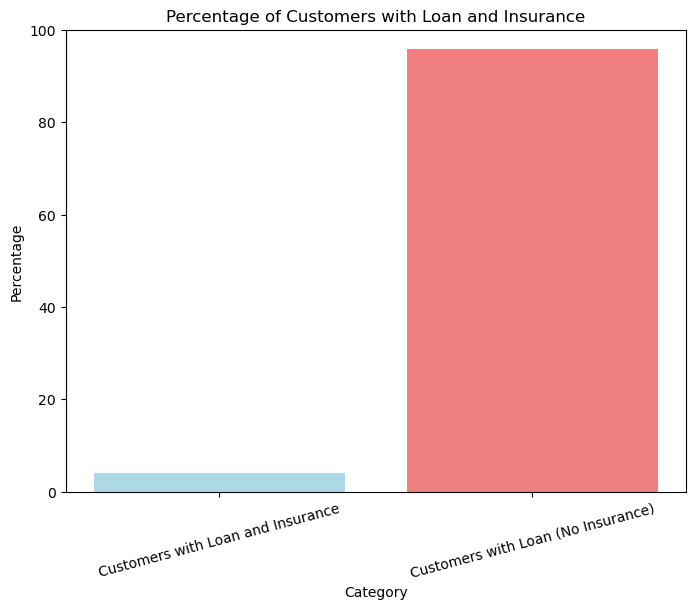

Percentage of customers with a loan who have insurance: 4.16%


In [98]:
categories = ['Customers with Loan and Insurance', 'Customers with Loan (No Insurance)']
percentages = [percentage_with_loan_and_insurance, 100 - percentage_with_loan_and_insurance]

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['lightblue', 'lightcoral'])
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Customers with Loan and Insurance')
plt.xticks(rotation=15)
plt.ylim(0, 100)
plt.show()

print(f"Percentage of customers with a loan who have insurance: {percentage_with_loan_and_insurance:.2f}%")

### 4)Communication Strategy Insights:
- Analyse and summarize the best Contact method (with the highest success 
percentage) to contact people to ascertain the status of term deposit subscriptions.


Term Deposit,no,yes
contact,,
Mobile,100.000000,NaN
Tel,45.000000,55.000000
cellular,85.106673,14.893327
telephone,86.736842,13.263158
unknown,95.913647,4.086353


<Figure size 1000x600 with 0 Axes>

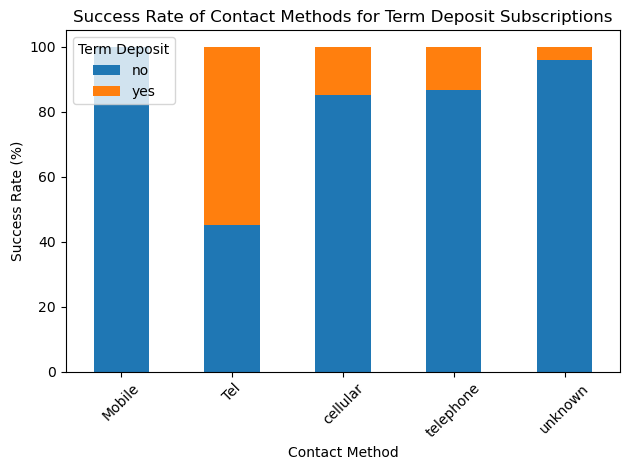

In [113]:
contact_success = merged_df.groupby('contact')['Term Deposit'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(10, 6))
contact_success.plot(kind='bar', stacked=True)
plt.xlabel('Contact Method')
plt.ylabel('Success Rate (%)')
plt.title('Success Rate of Contact Methods for Term Deposit Subscriptions')
plt.xticks(rotation=45)
plt.tight_layout()
contact_success

- It seems that "telephone" and "Tel" are likely two variations of the same contact method, but with slightly different labels might be due to data inconsistency .
- We can assume that these both are same contact method,when the customers are contacted through Telephone there are more chances that they would subscribe to Fixed deposit

### 5)Age and Home Loans:
- Determine which age group has the highest percentage of home loans. Present this data visually and discuss possible reasons.

In [121]:
age_home_loan_percentage = (merged_df.groupby('age')['housing'].value_counts(normalize=True)
                            .unstack().fillna(0)['yes'] * 100)

In [122]:
age_home_loan_percentage

age
18      0.000000
19      0.000000
20     26.000000
21     29.113924
22     44.961240
         ...    
94      0.000000
95      0.000000
115     0.000000
120    14.285714
121     5.555556
Name: yes, Length: 80, dtype: float64

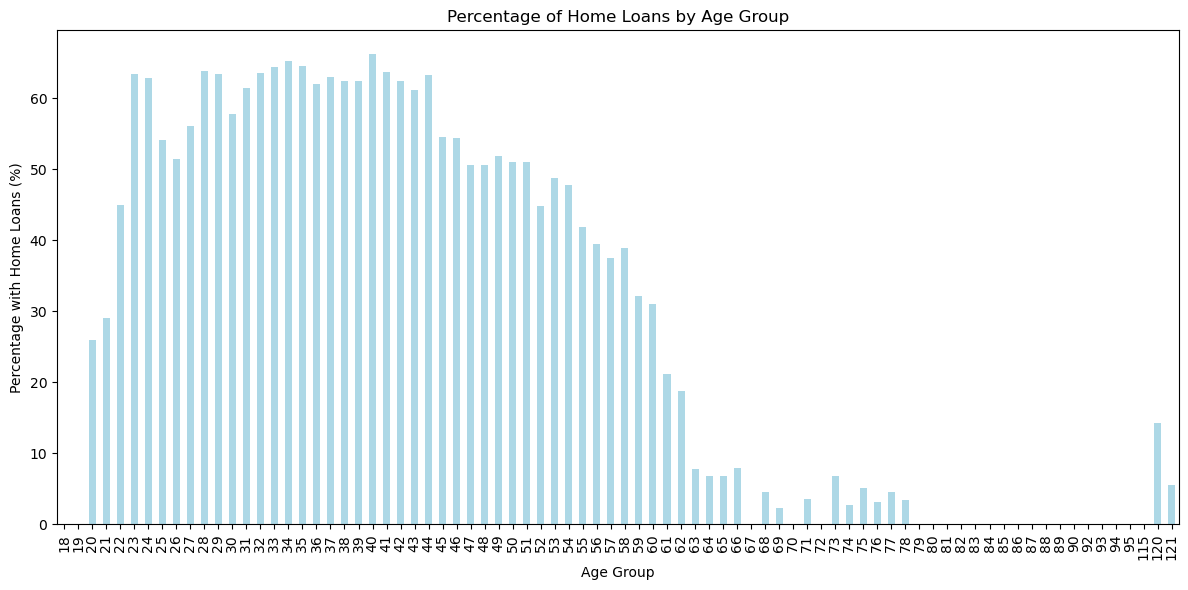

In [125]:
plt.figure(figsize=(12, 6))
age_home_loan_percentage.plot(kind='bar', color='lightblue')
plt.xlabel('Age Group')
plt.ylabel('Percentage with Home Loans (%)')
plt.title('Percentage of Home Loans by Age Group')
plt.xticks(rotation=90)
plt.tight_layout()

In [126]:
highest_home_loan_age_group = age_home_loan_percentage.idxmax()
highest_home_loan_percentage = age_home_loan_percentage.max()
print(f"The age group with the highest percentage of home loans is {highest_home_loan_age_group} "
      f"with a percentage of {highest_home_loan_percentage:.2f}%.")

The age group with the highest percentage of home loans is 40 with a percentage of 66.27%.


### creating the age groups and analyzing the percentage of home loans

In [128]:
age_bins = [18, 35, 50, 65, 121] 
age_labels = ['Young', 'Middle Age', 'Older', 'Senior']

In [130]:
merged_df['Age Group'] = pd.cut(merged_df['age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = merged_df['Age Group'].value_counts()

In [155]:
age_group_home_loan_percentage = (merged_df.groupby('Age Group')['housing'].apply(lambda x: (x == 'yes').sum() / len(x) * 100))

In [156]:
normalized_age_group_home_loan_percentage = age_group_home_loan_percentage / age_group_home_loan_percentage.sum() * 100

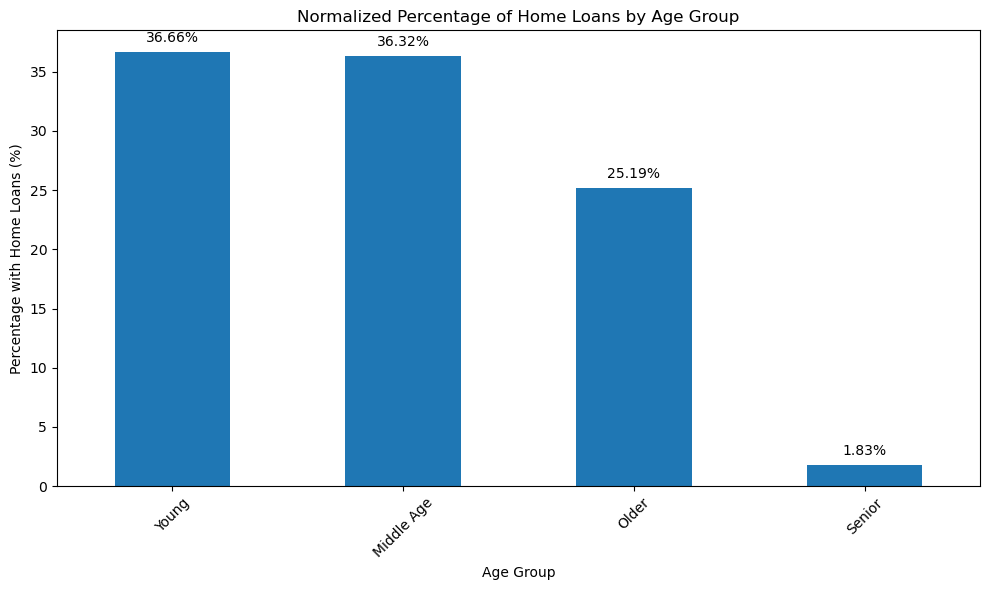

In [157]:
plt.figure(figsize=(10, 6))
ax = normalized_age_group_home_loan_percentage.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Percentage with Home Loans (%)')
plt.title('Normalized Percentage of Home Loans by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

- Customers aging between 18 to 35 has taken most home loans with 36.66% which is approximately equal to customers who have taken loan aging 35-50

### 6) Income and Age Relationship:
- Investigate any relationships between annual income and age group. Use 
appropriate plots and statistics to present the findings.

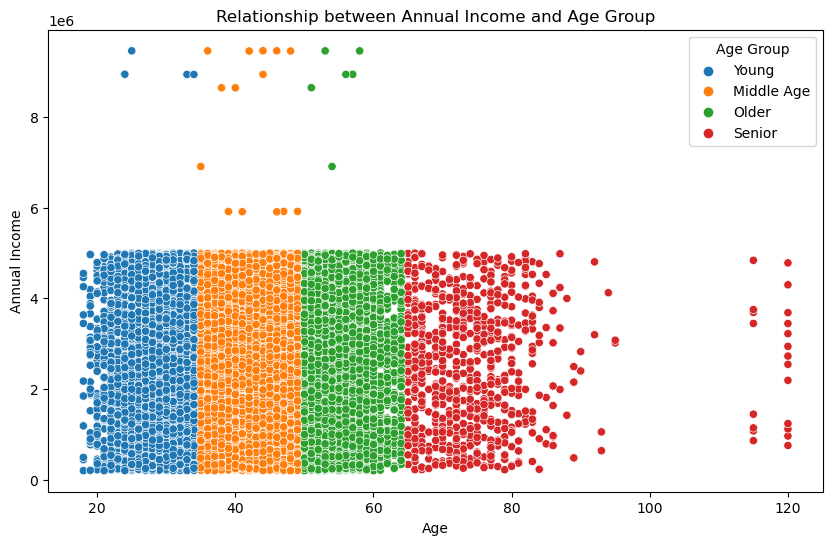

In [158]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='Annual Income', data=merged_df, hue='Age Group')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Relationship between Annual Income and Age Group')
plt.legend(title='Age Group')

Age Group
Young         2.585920e+06
Middle Age    2.603126e+06
Older         2.604516e+06
Senior        2.539136e+06
Name: Annual Income, dtype: float64


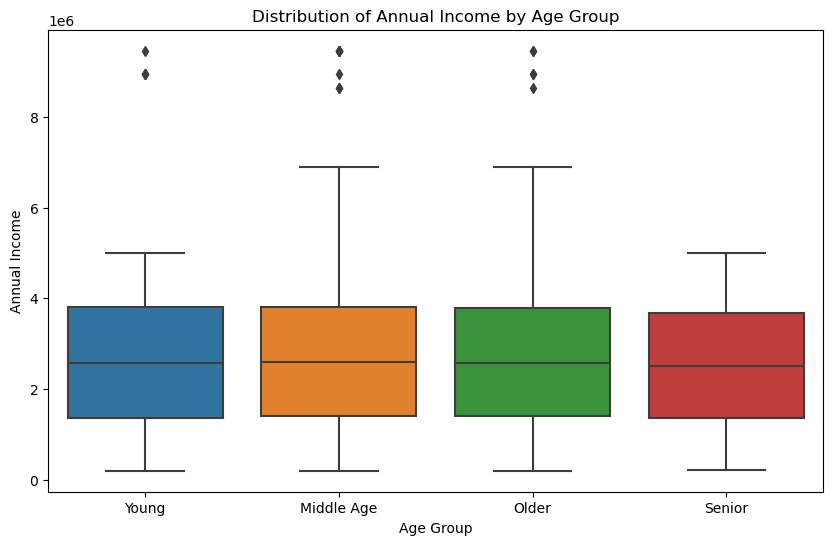

In [161]:
age_group_avg_income = merged_df.groupby('Age Group')['Annual Income'].mean()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Annual Income', data=merged_df, order=age_labels)
plt.xlabel('Age Group')
plt.ylabel('Annual Income')
plt.title('Distribution of Annual Income by Age Group')
print(age_group_avg_income)

plt.show()

- Middle aged and older aged customers have approximately same annual income
- But across the age groups, we found that the average annual income values were relatively similar. There is not a substantial variation in average income among these groups.
- While we observed similar average income values across age groups, this does not shows relationship between the variables.

### Term Deposit Subscription among different age groups

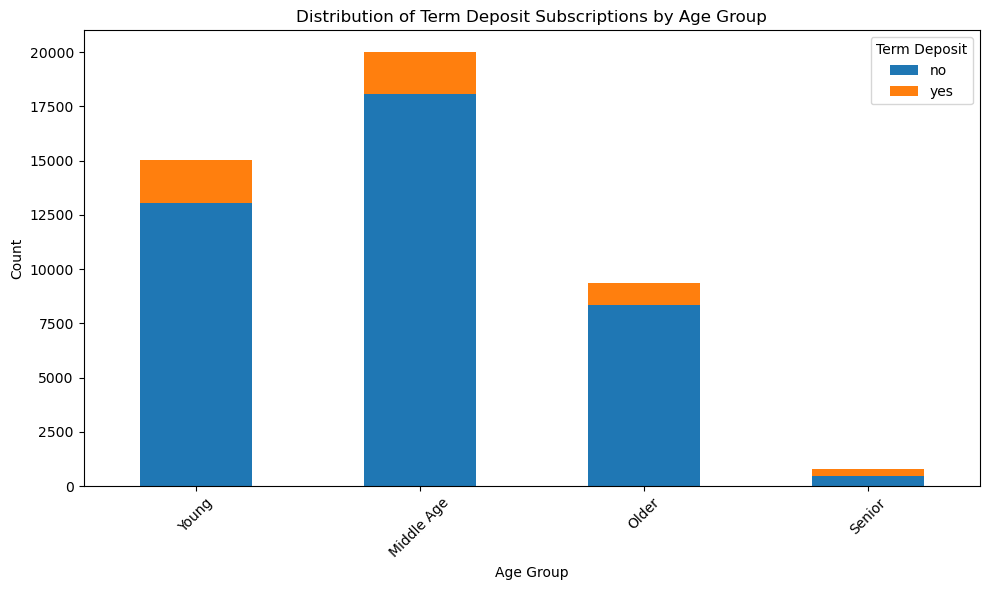

Term Deposit,no,yes
Age Group,,
Young,13033,1980
Middle Age,18080,1924
Older,8340,1044
Senior,460,332


In [164]:
age_group_subscription_counts = merged_df.groupby('Age Group')['Term Deposit'].value_counts().unstack()
age_group_subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Term Deposit Subscriptions by Age Group')
plt.legend(title='Term Deposit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
age_group_subscription_counts

- Customers aging between 18 to 50 has subscribed to Term deposit compare to customers aged above the 50

### Distribution of Loans, Insurance, and Term Deposits by Marital Status

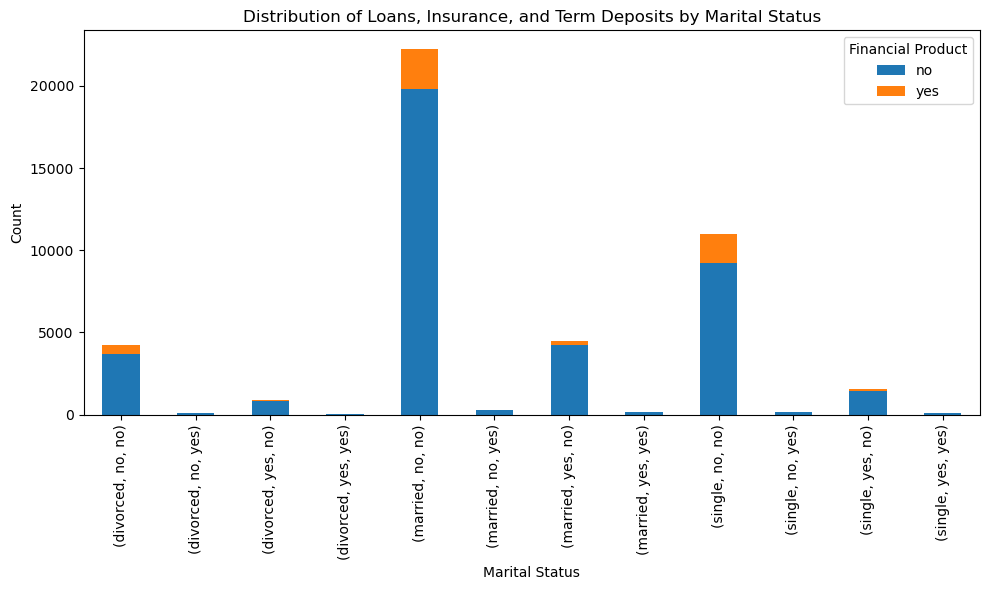

In [169]:
marital_loan_insurance_counts = merged_df.groupby('marital')['loan', 'Insurance', 'Term Deposit'].value_counts().unstack()
marital_loan_insurance_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Loans, Insurance, and Term Deposits by Marital Status')
plt.legend(title='Financial Product')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [170]:
marital_loan_insurance_counts

Term Deposit                no   yes
marital  loan Insurance             
divorced no   no          3662   547
              yes           67     8
         yes  no           804    64
              yes           49     3
married  no   no         19803  2471
              yes          271    14
         yes  no          4233   264
              yes          158     6
single   no   no          9220  1750
              yes          139    15
         yes  no          1437   141
              yes           79     6

- Divorced Individuals: Divorced individuals who do not have a loan show a relatively higher chances of subscribing  term deposit compared to those with a loan.
- Single Individuals: The success rates among single individuals are relatively consistent, regardless of loan status. This indicates that for single individuals, the presence of a loan may not significantly impact their likelihood of subscribing to a term deposit.
- Married Individuals: Those without a loan have a higher success rate compared to those with a loan.

# Correlation analysis

In [177]:
cat_features

Index(['Insurance', 'housing', 'loan', 'contact', 'poutcome', 'Term Deposit',
       'job', 'marital', 'education', 'Gender'],
      dtype='object')

In [176]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoder = LabelEncoder()
for col in cat_features:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

In [178]:
correlation_matrix = df_encoded.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  Insurance   balance   housing      loan   contact  duration  \
Insurance          1.000000 -0.047265 -0.006025  0.077234  0.014483 -0.009973   
balance           -0.047265  1.000000 -0.061573 -0.074517 -0.023296  0.021390   
housing           -0.006025 -0.061573  1.000000  0.041323  0.188706  0.004962   
loan               0.077234 -0.074517  0.041323  1.000000 -0.011148 -0.012376   
contact            0.014483 -0.023296  0.188706 -0.011148  1.000000 -0.020239   
duration          -0.009973  0.021390  0.004962 -0.012376 -0.020239  1.000000   
campaign           0.016953 -0.013569 -0.023945  0.010210  0.015761 -0.084534   
last_contact_day  -0.029871  0.001742  0.124525 -0.022660 -0.242781 -0.001537   
previous          -0.018329  0.015293  0.037076 -0.011043 -0.147176  0.001453   
poutcome           0.034070 -0.017061 -0.105970  0.013265  0.264412  0.011921   
Term Deposit      -0.022419  0.049748 -0.139173 -0.068185 -0.147699  0.393613   
Count_Tx

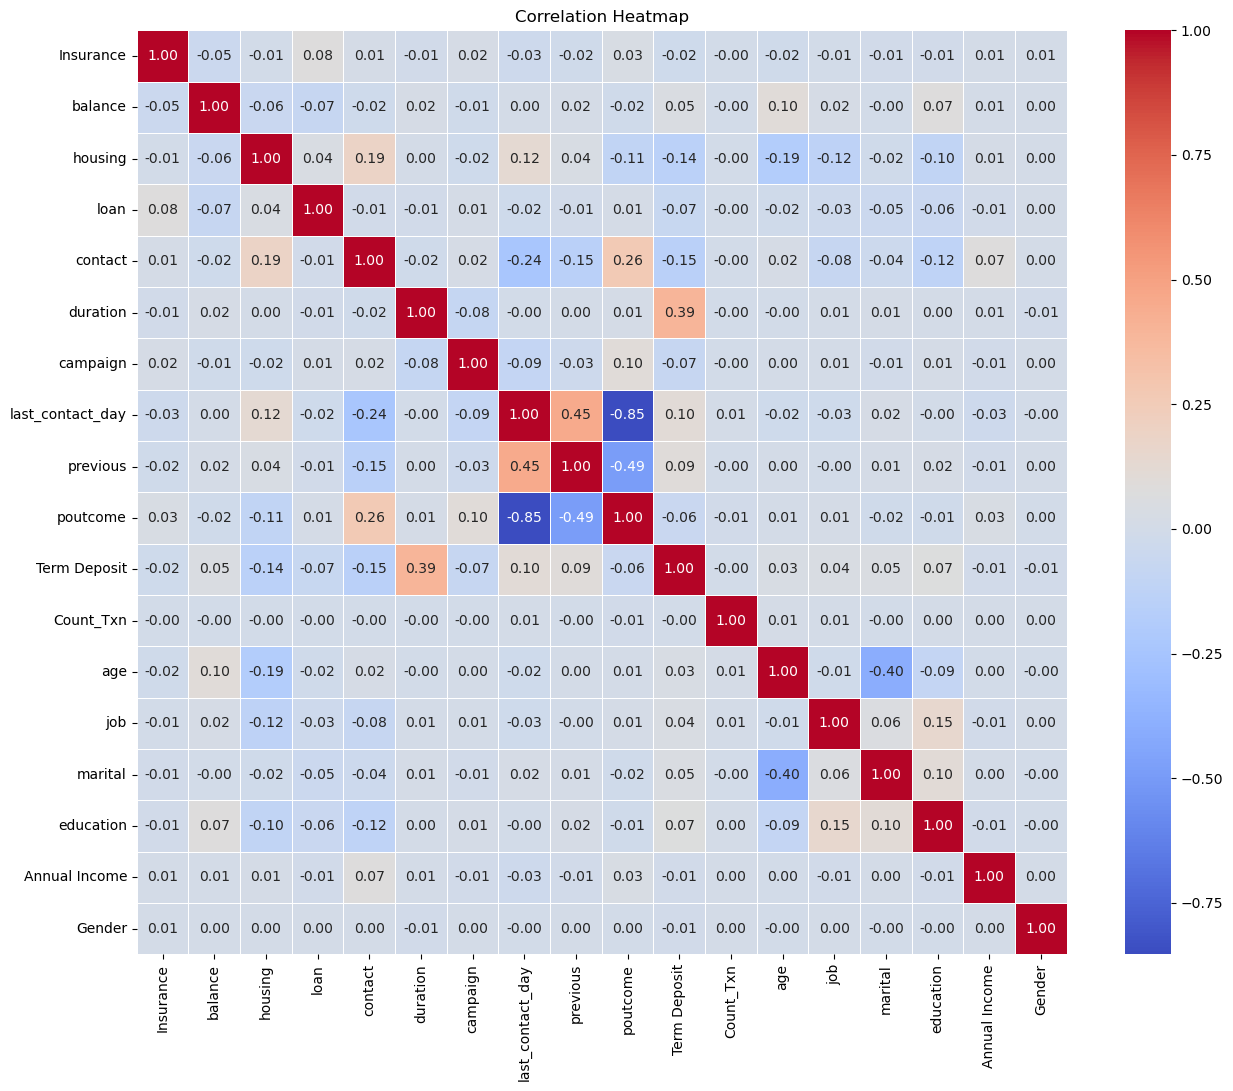

In [179]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

- Out of all features Insurance, Balance, Housing, Loan, Contact, Duration, Campaign, Last Contact Day, Previous, Poutcome,the highest correlation appears to be with the "Duration" column, suggesting that the duration of the contact has a relatively strong positive correlation with the success of the term deposit subscription. This is intuitive, as longer conversations might indicate more interest and engagement.
- This column appears to represent the count of transactions and its correlation with the "Term Deposit" column is close to zero, indicating that it has little influence on term deposit subscription.

# Clustering Analysis

In [181]:
dependent_variable = df['Term Deposit']
clustering_features = df.drop('Term Deposit', axis=1)

label_encoder = LabelEncoder()
for col in clustering_features.select_dtypes(include='object').columns:
    clustering_features[col] = label_encoder.fit_transform(clustering_features[col])

In [184]:
clustering_features

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Count_Txn,age,job,marital,education,Annual Income,Gender
0,0,2143.0,1,0,2,261.0,1,2,0,4,351.0,58,5,1,4,839368.0,1
1,0,29.0,1,0,4,151.0,1,2,0,4,326.0,44,10,2,2,1452858.0,1
2,0,2.0,1,1,4,76.0,1,2,0,4,422.0,33,3,1,2,4851383.0,0
3,0,1506.0,1,0,4,92.0,1,2,0,4,113.0,47,1,1,5,3207754.0,0
4,0,1.0,0,0,4,198.0,1,2,0,4,342.0,33,12,2,5,2562322.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,825.0,0,0,2,0.0,0,-1,0,4,152.0,51,10,1,4,2229818.0,1
45207,0,1729.0,0,0,2,0.0,0,-1,0,4,334.0,121,6,0,1,2783556.0,1
45208,0,5715.0,0,0,2,1127.0,5,184,3,3,381.0,72,6,1,2,443512.0,1
45209,0,668.0,0,0,3,0.0,0,-1,0,4,211.0,57,2,1,2,4193684.0,0


In [185]:
df.columns

Index(['Insurance', 'balance', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'last_contact_day', 'previous', 'poutcome', 'Term Deposit',
       'Count_Txn', 'age', 'job', 'marital', 'education', 'Annual Income',
       'Gender'],
      dtype='object')

In [183]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

In [187]:
clust_data=pd.DataFrame(scaled_features,columns=['Insurance', 'balance', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'last_contact_day', 'previous', 'poutcome','Count_Txn', 'age', 'job', 'marital', 'education', 'Annual Income',
       'Gender'])
clust_data

,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Count_Txn,age,job,marital,education,Annual Income,Gender
0,-0.13549,0.240851,0.893915,-0.436803,-0.705523,0.011369,-0.570792,-0.400502,-0.251940,0.442267,0.444049,1.570378,-0.064622,-0.275811,1.224013,-1.261421,0.814940
1,-0.13549,-0.459067,0.893915,-0.436803,1.516364,-0.415769,-0.570792,-0.400502,-0.251940,0.442267,0.228009,0.278645,1.389641,1.368617,-0.475896,-0.821021,0.814940
2,-0.13549,-0.468006,0.893915,2.289359,1.516364,-0.707000,-0.570792,-0.400502,-0.251940,0.442267,1.057603,-0.736288,-0.646327,-0.275811,-0.475896,1.618644,-1.227084
3,-0.13549,0.029948,0.893915,-0.436803,1.516364,-0.644871,-0.570792,-0.400502,-0.251940,0.442267,-1.612653,0.555445,-1.228032,-0.275811,2.073967,0.438748,-1.227084
4,-0.13549,-0.468337,-1.118674,-0.436803,1.516364,-0.233265,-0.570792,-0.400502,-0.251940,0.442267,0.366275,-0.736288,1.971346,1.368617,2.073967,-0.024581,0.814940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,-0.13549,-0.195522,-1.118674,-0.436803,-0.705523,-1.002114,-0.894704,-0.430666,-0.251940,0.442267,-1.275630,0.924511,1.389641,-0.275811,1.224013,-0.263273,0.814940
45207,-0.13549,0.103781,-1.118674,-0.436803,-0.705523,-1.002114,-0.894704,-0.430666,-0.251940,0.442267,0.297142,7.383176,0.226231,-1.920240,-1.325851,0.134234,0.814940
45208,-0.13549,1.423492,-1.118674,-0.436803,-0.705523,3.374115,0.724857,1.429455,1.050473,-0.305362,0.703297,2.862111,0.226231,-0.275811,-0.475896,-1.545590,0.814940
45209,-0.13549,-0.247502,-1.118674,-0.436803,0.405420,-1.002114,-0.894704,-0.430666,-0.251940,0.442267,-0.765776,1.478111,-0.937179,-0.275811,-0.475896,1.146508,-1.227084


In [188]:
from sklearn.cluster import KMeans

In [189]:
def plot_inertia(data, no_of_k):
    inertia = []
    for k in range(1, no_of_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    plt.plot(range(1, no_of_k+1), inertia, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-cluster Sum of Squares (Inertia)')
    plt.title('Elbow Method to Determine Optimal K')
    plt.show()

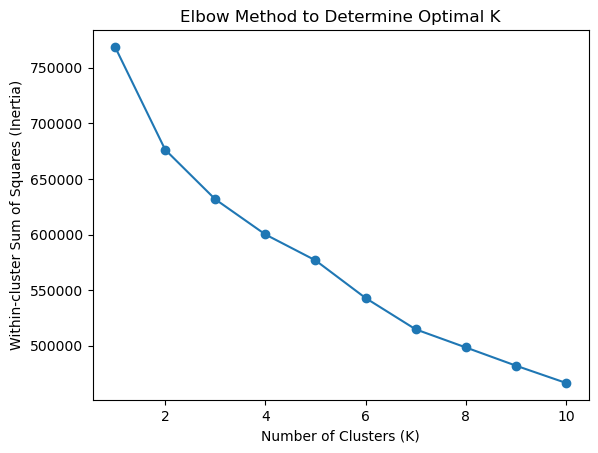

In [190]:
plot_inertia(clust_data,10)

In [191]:
from sklearn.metrics import silhouette_score

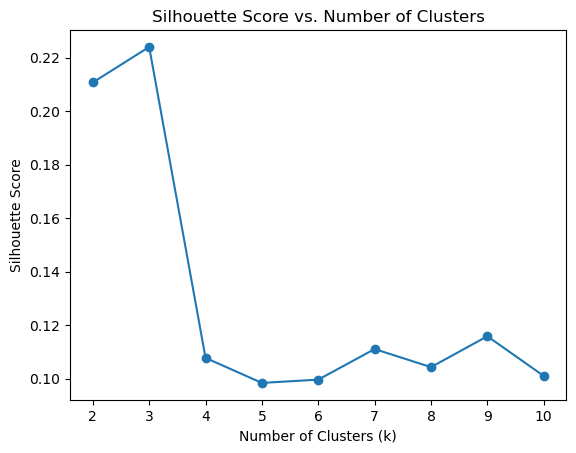

In [192]:
silhouette_scores = [] 
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(clust_data)
    silhouette_avg = silhouette_score(clust_data, clusters)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

- A silhouette score of 0.1 to 0.22 suggests that the clusters are overlapping and not well-separated so clusters are overlapping
- Since earlier we had performed the correlation analysis, in that we have seen that there was no relationship among the variables so these might be the reason for overlapping of clusters,since Clustering algorithms attempt to group similar data points together based on certain features

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

In [55]:
x=df.drop(columns=['Term Deposit'])
y=df['Term Deposit']

# Model Building

### Feature Scaling

In [58]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Since our dataset is imbalanced so lets create the base model ans check for model accuracy further we carry out feature selection,upsampling the data

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### Logistic Regression

In [61]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
yhat = log_clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, log_clf.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 88.73%
Training Accuracy: 89.29%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043



### Support Vector Machines

In [67]:
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)
yhat = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, svm_clf.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 89.53%
Training Accuracy: 90.72%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.28      0.39      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043



### K-nearest neighbors

In [68]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
yhat = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, knn_clf.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 88.76%
Training Accuracy: 91.54%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.57      0.29      0.38      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.63      0.66      9043
weighted avg       0.87      0.89      0.87      9043



### Random Forest

In [72]:
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42,max_depth=32,min_samples_split=10)
rf_clf.fit(X_train, y_train)
yhat = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, rf_clf.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 89.76%
Training Accuracy: 96.62%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.63      0.37      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.71      9043
weighted avg       0.88      0.90      0.89      9043



- As we can see that for each model built we can observe that
- Precision:class 0(no)(negative class) has a precision higher, and class 1 (positive class) has a precision is low . This suggests that the model is better at correctly predicting class 0.
- Recall: Class 0 has a recall high, indicating that the model is good at identifying true negatives. Class 1 has a recall is low comparitively, suggesting that the model struggles with correctly identifying true positives for class 1.
- Since the data is imbalanced we could upsample the data

### Upsampling the data using smote method

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
smote = SMOTE(random_state=42)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

In [76]:
len(X_upsampled)

79844

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

### Logistic Regression

In [78]:
log_clf1 = LogisticRegression()
log_clf1.fit(X_train, y_train)
yhat = log_clf1.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, log_clf1.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 80.93%
Training Accuracy: 81.42%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      7908
           1       0.81      0.81      0.81      8061

    accuracy                           0.81     15969
   macro avg       0.81      0.81      0.81     15969
weighted avg       0.81      0.81      0.81     15969



### Support Vector Machines

In [79]:
svm_clf1 = SVC(kernel='rbf')
svm_clf1.fit(X_train, y_train)
yhat = svm_clf1.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, svm_clf1.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 85.63%
Training Accuracy: 86.94%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      7908
           1       0.83      0.90      0.86      8061

    accuracy                           0.86     15969
   macro avg       0.86      0.86      0.86     15969
weighted avg       0.86      0.86      0.86     15969



### K-nearest neighbors

In [82]:
knn_clf1 = KNeighborsClassifier(n_neighbors=6)
knn_clf1.fit(X_train, y_train)
yhat = knn_clf1.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, knn_clf1.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 90.48%
Training Accuracy: 93.23%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      7908
           1       0.85      0.98      0.91      8061

    accuracy                           0.90     15969
   macro avg       0.92      0.90      0.90     15969
weighted avg       0.91      0.90      0.90     15969



### Random Forest

In [106]:
rf_clf1 = RandomForestClassifier(n_estimators=500, random_state=42,max_depth=16,min_samples_split=10)
rf_clf1.fit(X_train, y_train)
yhat = rf_clf1.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, rf_clf1.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 91.30%
Training Accuracy: 95.05%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7908
           1       0.90      0.94      0.92      8061

    accuracy                           0.91     15969
   macro avg       0.91      0.91      0.91     15969
weighted avg       0.91      0.91      0.91     15969



### Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
nb_clf1 = GaussianNB()
nb_clf1.fit(X_train, y_train)
y_pred = nb_clf1.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))
train_accuracy = accuracy_score(y_train, nb_clf1.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Test Accuracy: 75.22%
Training Accuracy: 75.40%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.66      0.72      7908
           1       0.72      0.84      0.77      8061

    accuracy                           0.75     15969
   macro avg       0.76      0.75      0.75     15969
weighted avg       0.76      0.75      0.75     15969



### Xgboost

In [99]:
from xgboost import XGBClassifier

In [104]:
xgb_clf1 = XGBClassifier(n_estimators=500,learning_rate=0.1,max_depth=6)
xgb_clf1.fit(X_train, y_train)
y_pred = xgb_clf1.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))
train_accuracy = accuracy_score(y_train, xgb_clf1.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Test Accuracy: 93.82%
Training Accuracy: 97.31%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7908
           1       0.95      0.92      0.94      8061

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969



### Adaboost

In [105]:
ada_clf1 = AdaBoostClassifier(random_state=42)
ada_clf1.fit(X_train, y_train)
y_pred = ada_clf1.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))
train_accuracy = accuracy_score(y_train, ada_clf1.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Test Accuracy: 87.91%
Training Accuracy: 88.24%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7908
           1       0.88      0.88      0.88      8061

    accuracy                           0.88     15969
   macro avg       0.88      0.88      0.88     15969
weighted avg       0.88      0.88      0.88     15969



- The model accuracy has been improved where precision and recall for class 1(yes) are well improved 
- We got good result by using algorithm such as xgboost,knn,random forest after upsampling 

# Feature selection using chi2,RFE

- calculate p-values using chi square for each feature and then select the ones that have p-values below a certain significance level (e.g., 0.05).

In [108]:
import statsmodels.api as sm
target_column = 'Term Deposit'
feature_columns = df.columns.drop(target_column)
df['intercept'] = 1
logit_model = sm.Logit(df[target_column], df[feature_columns])
result = logit_model.fit()
p_values = result.pvalues
significance_level = 0.05

Optimization terminated successfully.
         Current function value: 0.271560
         Iterations 8


In [109]:
selected_features = p_values[p_values < significance_level]
top_10_features = selected_features.sort_values().index[:10]
df.drop('intercept', axis=1, inplace=True)
selected_df = df[top_10_features.append(pd.Index([target_column]))]
print("Top 10 Selected Features:")
print(selected_df.head())

Top 10 Selected Features:
   duration  housing  contact  campaign  loan  last_contact_day  previous  \
0     261.0        1        2         1     0                 2         0   
1     151.0        1        4         1     0                 2         0   
2      76.0        1        4         1     1                 2         0   
3      92.0        1        4         1     0                 2         0   
4     198.0        0        4         1     0                 2         0   

   age  Count_Txn  Annual Income  Term Deposit  
0   58      351.0       839368.0             0  
1   44      326.0      1452858.0             0  
2   33      422.0      4851383.0             0  
3   47      113.0      3207754.0             0  
4   33      342.0      2562322.0             0  


# Based on chi2

In [133]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [134]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [135]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
k_best_selector = SelectKBest(score_func=chi2, k=10)
k_best_selector.fit(X_train_scaled, y_train)
selected_features_indices = k_best_selector.get_support(indices=True)
chi2_selected_features = X_train.columns[selected_features_indices]

In [137]:
X_train_selected = X_train[chi2_selected_features]
X_test_selected = X_test[chi2_selected_features]
print("Top 10 Selected Features:")
print(chi2_selected_features)

Top 10 Selected Features:
Index(['Insurance', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'last_contact_day', 'poutcome', 'marital', 'education'],
      dtype='object')


# Based on RFE

In [138]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [139]:
model = LogisticRegression() 
num_features_to_select = 10 
rfe_selector = RFE(estimator=model, n_features_to_select=num_features_to_select)
rfe_selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [140]:
selected_features_indices = rfe_selector.get_support(indices=True)
rfe_selected_features = X_train.columns[selected_features_indices]
X_train_selected = X_train[rfe_selected_features]
X_test_selected = X_test[rfe_selected_features]

In [141]:
print("Top 10 Selected Features:")
print(rfe_selected_features)

Top 10 Selected Features:
Index(['Insurance', 'housing', 'loan', 'contact', 'campaign', 'previous',
       'poutcome', 'marital', 'education', 'Gender'],
      dtype='object')


In [142]:
chi2_features = ['Insurance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'last_contact_day', 'poutcome', 'marital', 'education']
rfe_features = ['Insurance', 'housing', 'loan', 'contact', 'campaign', 'previous', 'poutcome', 'marital', 'education', 'Gender']
common_features = list(set(chi2_features) & set(rfe_features))
print("Common Features:", common_features)


Common Features: ['housing', 'poutcome', 'Insurance', 'loan', 'contact', 'education', 'marital', 'campaign']


### Model building based on top 10 chi2 features

In [153]:
x = df[chi2_selected_features]
y = df['Term Deposit']

In [154]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [155]:
smote = SMOTE(random_state=42)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

### Logistic Regression

In [157]:
log_clf2 = LogisticRegression()
log_clf2.fit(X_train, y_train)
yhat = log_clf2.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, log_clf2.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 79.80%
Training Accuracy: 80.15%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      7908
           1       0.80      0.80      0.80      8061

    accuracy                           0.80     15969
   macro avg       0.80      0.80      0.80     15969
weighted avg       0.80      0.80      0.80     15969



### Support vector machines

In [158]:
svm_clf2 = SVC(kernel='rbf')
svm_clf2.fit(X_train, y_train)
yhat = svm_clf2.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, svm_clf2.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 82.90%
Training Accuracy: 83.33%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      7908
           1       0.81      0.86      0.84      8061

    accuracy                           0.83     15969
   macro avg       0.83      0.83      0.83     15969
weighted avg       0.83      0.83      0.83     15969



### K-nearest neighbors

In [160]:
knn_clf2 = KNeighborsClassifier(n_neighbors=8)
knn_clf2.fit(X_train, y_train)
yhat = knn_clf2.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, knn_clf2.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 85.73%
Training Accuracy: 88.54%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7908
           1       0.84      0.88      0.86      8061

    accuracy                           0.86     15969
   macro avg       0.86      0.86      0.86     15969
weighted avg       0.86      0.86      0.86     15969



### Random forest

In [161]:
rf_clf2 = RandomForestClassifier(n_estimators=500, random_state=42,max_depth=16,min_samples_split=10)
rf_clf2.fit(X_train, y_train)
yhat = rf_clf2.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, rf_clf2.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 87.75%
Training Accuracy: 90.25%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      7908
           1       0.86      0.91      0.88      8061

    accuracy                           0.88     15969
   macro avg       0.88      0.88      0.88     15969
weighted avg       0.88      0.88      0.88     15969



### Naive Bayes

In [162]:
nb_clf2 = GaussianNB()
nb_clf2.fit(X_train, y_train)
y_pred = nb_clf2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))
train_accuracy = accuracy_score(y_train, nb_clf2.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Test Accuracy: 73.88%
Training Accuracy: 73.79%
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.70      7908
           1       0.69      0.87      0.77      8061

    accuracy                           0.74     15969
   macro avg       0.76      0.74      0.73     15969
weighted avg       0.76      0.74      0.73     15969



### Xgboost

In [163]:
xgb_clf2 = XGBClassifier(n_estimators=500,learning_rate=0.1,max_depth=6)
xgb_clf2.fit(X_train, y_train)
y_pred = xgb_clf2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))
train_accuracy = accuracy_score(y_train, xgb_clf2.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Test Accuracy: 88.75%
Training Accuracy: 90.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      7908
           1       0.87      0.91      0.89      8061

    accuracy                           0.89     15969
   macro avg       0.89      0.89      0.89     15969
weighted avg       0.89      0.89      0.89     15969



### Analysis before and after feature selection
- Test and Training Accuracy(Random Forest):

- Before Feature Selection: The initial test accuracy was 91.30%, and the training accuracy was 95.05%.
- After Feature Selection: The test accuracy dropped to 87.75%, and the training accuracy dropped to 90.25%.

- The initial model had a higher test accuracy compared to the model after feature selection, suggesting that the original model was performing better on unseen data.
- The drop in training accuracy after feature selection indicates that the model is now less overfit to the training data, which can be a positive outcome.

- feature selection seems to have had a mixed impact on the model's performance. 

### Model building based on top 10 rfe features

In [164]:
x = df[rfe_selected_features]
y = df['Term Deposit']

In [165]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [166]:
smote = SMOTE(random_state=42)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

In [168]:
log_clf3 = LogisticRegression()
log_clf3.fit(X_train, y_train)
yhat = log_clf3.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, log_clf3.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 66.03%
Training Accuracy: 66.62%
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65      7908
           1       0.65      0.69      0.67      8061

    accuracy                           0.66     15969
   macro avg       0.66      0.66      0.66     15969
weighted avg       0.66      0.66      0.66     15969



- Sudden drop in validation accuracy using rfe top 10 features so chi2 feature selection was way better than the rfe method

### Using Decison trees for feature selection

In [173]:
x = df.drop(columns=['Term Deposit'])
y = df['Term Deposit']

In [174]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [175]:
smote = SMOTE(random_state=42)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

In [177]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [182]:
feature_importances = rf_clf.feature_importances_
feature_importance_list = list(zip(df.columns, feature_importances))
feature_importance_list.sort(key=lambda x: x[1], reverse=True)
top_features = [feature for feature, importance in feature_importance_list[:10]]

In [181]:
top_features

['duration',
 'campaign',
 'balance',
 'Count_Txn',
 'contact',
 'education',
 'Term Deposit',
 'age',
 'poutcome',
 'housing']

In [241]:
x = df[['duration',
 'campaign',
 'balance',
 'Count_Txn',
 'contact',
 'education',
 'age',
 'poutcome',
 'housing']]
y = df['Term Deposit']

In [242]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [243]:
smote = SMOTE(random_state=42)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

In [245]:
x

,duration,campaign,balance,Count_Txn,contact,education,age,poutcome,housing
0,261.0,1,2143.0,351.0,2,4,58,4,1
1,151.0,1,29.0,326.0,4,2,44,4,1
2,76.0,1,2.0,422.0,4,2,33,4,1
3,92.0,1,1506.0,113.0,4,5,47,4,1
4,198.0,1,1.0,342.0,4,5,33,4,0
...,...,...,...,...,...,...,...,...,...
45206,0.0,0,825.0,152.0,2,4,51,4,0
45207,0.0,0,1729.0,334.0,2,1,121,4,0
45208,1127.0,5,5715.0,381.0,2,2,72,3,0
45209,0.0,0,668.0,211.0,3,2,57,4,0


### Logistic Regression

In [246]:
log_clf4 = LogisticRegression()
log_clf4.fit(X_train, y_train)
yhat = log_clf4.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, log_clf4.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 79.42%
Training Accuracy: 79.63%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      7908
           1       0.79      0.80      0.80      8061

    accuracy                           0.79     15969
   macro avg       0.79      0.79      0.79     15969
weighted avg       0.79      0.79      0.79     15969



In [247]:
from sklearn.model_selection import cross_val_score

In [248]:
cv_scores = cross_val_score(log_clf4, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score: %.2f%%" % (cv_scores.mean() * 100))

Cross-Validation Scores: [0.79491194 0.79866928 0.79921722 0.7897456  0.79913894]
Average Cross-Validation Score: 79.63%


In [249]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

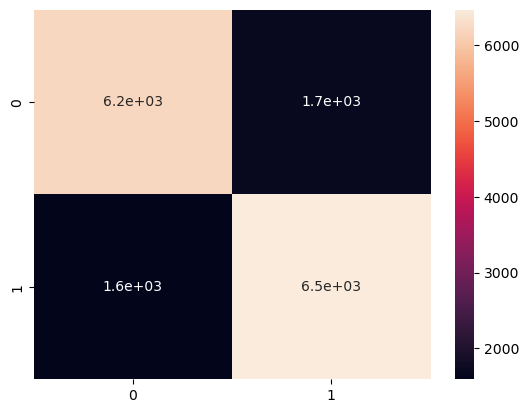

In [250]:
confusion = confusion_matrix(y_test, yhat)
sns.heatmap(confusion,annot=True)

### support vector machines

In [251]:
svm_clf4 = SVC(kernel='rbf')
svm_clf4.fit(X_train, y_train)
yhat = svm_clf4.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, svm_clf4.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 83.56%
Training Accuracy: 84.13%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      7908
           1       0.81      0.87      0.84      8061

    accuracy                           0.84     15969
   macro avg       0.84      0.84      0.84     15969
weighted avg       0.84      0.84      0.84     15969



In [252]:
cv_scores = cross_val_score(svm_clf4, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score: %.2f%%" % (cv_scores.mean() * 100))

Cross-Validation Scores: [0.83686888 0.8378865  0.83530333 0.83428571 0.84187867]
Average Cross-Validation Score: 83.72%


<AxesSubplot:>

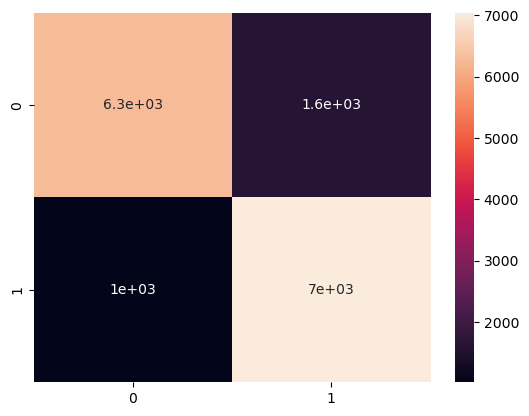

In [253]:
confusion = confusion_matrix(y_test, yhat)
sns.heatmap(confusion,annot=True)

### Random Forest

In [254]:
rf_clf4 = RandomForestClassifier(n_estimators=500, random_state=42,max_depth=16,min_samples_split=10)
rf_clf4.fit(X_train, y_train)
yhat = rf_clf4.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Test Accuracy: %.2f%%' % (accuracy * 100))
train_accuracy = accuracy_score(y_train, rf_clf4.predict(X_train))
print('Training Accuracy: %.2f%%' % (train_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test, yhat))

Test Accuracy: 89.96%
Training Accuracy: 93.92%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      7908
           1       0.88      0.93      0.90      8061

    accuracy                           0.90     15969
   macro avg       0.90      0.90      0.90     15969
weighted avg       0.90      0.90      0.90     15969



In [255]:
cv_scores = cross_val_score(rf_clf4, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score: %.2f%%" % (cv_scores.mean() * 100))

Cross-Validation Scores: [0.8969863  0.90426614 0.90418787 0.89925636 0.90387476]
Average Cross-Validation Score: 90.17%


In [256]:
y_test.value_counts()

1    8061
0    7908
Name: Term Deposit, dtype: int64

<AxesSubplot:>

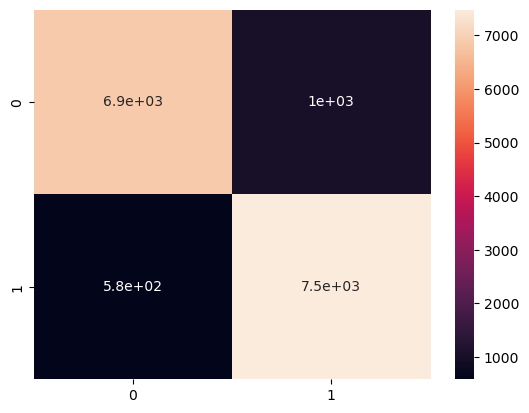

In [257]:
confusion = confusion_matrix(y_test, yhat)
sns.heatmap(confusion,annot=True)

- Both feature selection methods such as chi2 and tree based methods gave good accuracy on both Train and test data with well balanced precision and recall for class 1(Yes) and slight drop in overfitting.

### Conclusion

- The common features in both the Random Forest Feature Selection and the Chi-Squared Test results are:
- Out of all features in data only these features tends to be more significant to Term Deposit:

- 'contact'
- 'duration'
- 'campaign'
- 'poutcome'
- 'housing'

- Contact: This feature could be crucial as it indicates the communication method used to reach out to customers. A more effective and personalized contact method could positively influence a customer's decision to subscribe.

- Duration: The duration of the previous contact with the customer is likely to be significant. Longer interactions might imply more engagement and interest, increasing the chance of a term deposit subscription.

- Campaign: The number of contacts made during the campaign could play a role. Too many contacts might lead to annoyance, while an optimal number could improve subscription rates.

- Poutcome: The outcome of the previous marketing campaign (poutcome) suggests that if a customer has shown interest or subscribed before, they might be more likely to subscribe again in the current campaign.

- Housing: This feature relates to whether a customer has a housing loan. Customers with more stable financial situations (without housing loans) might be more inclined to invest in a term deposit.

### Best model after Upsampling:
- K-Nearest Neighbors (KNN):
- Test Accuracy: 91%
- Training Accuracy: 93%
- KNN performed on par with Random Forest,xgboost achieving 91% accuracy on the test set. It also showed consistent performance between training and test data.

### Best model after Feature Selection using chi2:

- Xgboost:
- Test Accuracy: 90%
- Training Accuracy: 88%
- Xgboost performed on par with Random Forest,svm,knn,xgboost achieving 88% accuracy on the test set. It also showed consistent performance between training and test data
